# HAMOYE STAGE_B QUIZ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

# Importing necessary metric
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv('energydata_complete.csv')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E31AFFF48>,
      dtype=object)

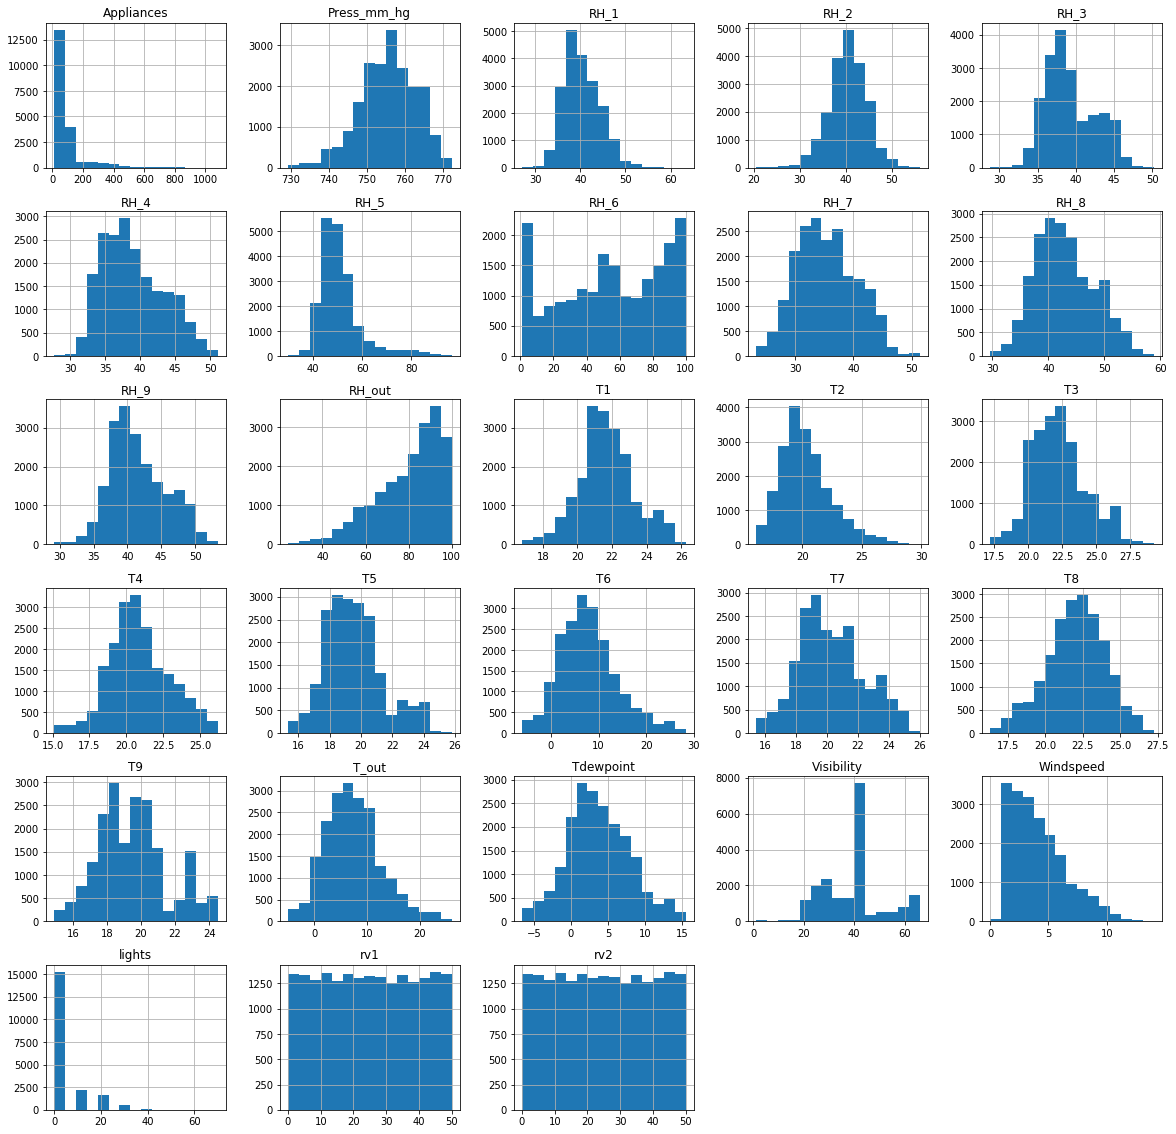

In [8]:
# Visualization of the histogram of all the features to understand the  distribution
df.hist(bins=15, figsize=(20,20))

**The following can be obsered**

All the readings from sensors inside the house are from a Normal distribution whereas RH_6 and RH_out which are the outside humidity sensors

Also all temperature readings follow a Normal distribution except for T9.

It can be noticed that Visibility, Windspeed and Appliances are skewed.

Lastly, the light histogram shows that the are more zero entries in the column, hence we can drop it.

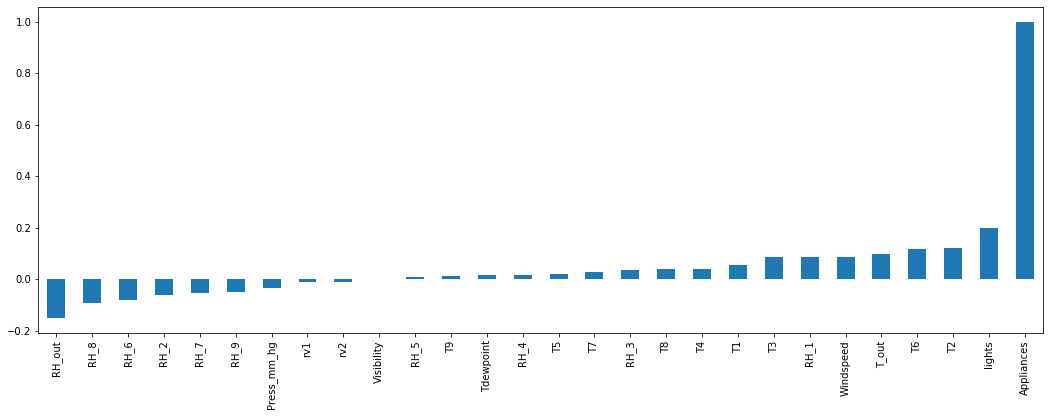

In [9]:
# Look at correlation with target
df.corr()['Appliances'].sort_values().plot(kind='bar', figsize=(18, 6))

**It can be noticed that certain columns fall under the zero point which implies that it has negetive correlation with the target and we might consider dropping them.** 

In [10]:
df = df.drop(['date', 'lights'], axis=1)

In [11]:
X =  df.drop('Appliances', axis=1)#chosen predictor
Y=  df['Appliances'] #target variable, 

In [12]:
# Splitting the trained data
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Question 18 
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?


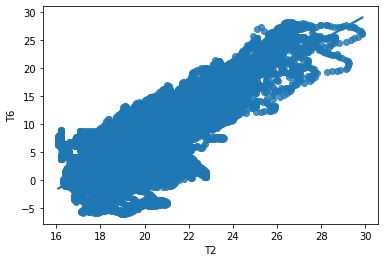

In [13]:
sns.regplot(x="T2", y="T6",data=df)

In [14]:
x =  df[['T2']]
y=  df[['T6']] 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
lr = LinearRegression().fit(x, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13814, 1), (5921, 1), (13814, 1), (5921, 1))

In [15]:
pred_2 = lr.predict(x_test)

 ## Question 18
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [16]:
r2_score = r2_score(y_test, pred_2)
round(r2_score, 2)

0.64

## Training and Testing

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13814, 26), (5921, 26), (13814,), (5921,))

In [19]:
lr = LinearRegression().fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.14471942308518748

In [20]:
# Dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso()}

In [21]:
 # store properties of each model
 ppty = []
# loop through the dictionary of models
for reg_name, regressor in models.items():
    # empty dict for storing properties of each models
    reg = {}
    # store the name of each model
    reg['Name'] = reg_name
    # fit the regressor model
    regressor.fit(X_train, Y_train)
    reg['Train_score'] = regressor.score(X_train, Y_train)
    reg['Test_score'] = regressor.score(X_test, Y_test)
    reg['MAE'] = mean_absolute_error(Y_test, regressor.predict(X_test))
    reg['MSE'] = mean_squared_error(Y_test, regressor.predict(X_test))
    reg['RMSE'] = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
    # append the properties of a single regressor to the prop list
    ppty.append(reg)
    # create a dataframe to list of all the model properties
    summary = pd.DataFrame(ppty)

In [22]:
  summary

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.144719,0.148901,53.642597,8768.556111,93.640569
1,Lasso,0.141003,0.144315,53.527815,8815.801087,93.892498


## Question 6 
What is the Residual Sum of Squares (in two decimal places)?

In [23]:
pred = lr.predict(X_test)

In [24]:
y_test=np.array(Y_test)
pred= np.array(pred)
rss = np.sum(np.square(y_test-pred))
round(rss,2)

51918501.21

In [28]:
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, Y_train)
pred2 = ridge.predict(X_test)

## Question 2 

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [29]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)
pred3 = lasso.predict(X_test)

C:\Users\DEPT OF CHEMICAL ENG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6136226.882484287, tolerance: 14642.917148544962
  positive)


In [30]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
lr_weights = get_weights_df(lr, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso, X_train, 'Lasso_weight')
final_weights = pd.merge(lr_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,T9,-21.148452,-21.144194,-2.113836e+01
1,T2,-18.370030,-18.365719,-1.836318e+01
2,RH_2,-13.740748,-13.738775,-1.373723e+01
3,T_out,-11.073628,-11.070412,-1.105957e+01
4,RH_8,-5.778861,-5.778774,-5.778977e+00
5,RH_9,-1.762680,-1.762822,-1.762338e+00
6,RH_7,-1.692787,-1.692745,-1.691936e+00
7,T5,-1.600843,-1.602047,-1.601612e+00
8,RH_out,-1.093521,-1.093058,-1.091186e+00
9,T1,-0.370721,-0.371657,-3.665146e-01


## Question 4 
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

## Question 11 
What is the new RMSE with the Lasso Regression (in 3 decimal places)?

In [31]:
rmse = np.sqrt(mean_squared_error(Y_test, pred3))
round(rmse, 3) 

93.64

## Question 10 
What is the Mean Absolute Error (in two decimal places)?

In [32]:
mae = mean_absolute_error(Y_test, pred3)
round(mae, 3) 

53.642

## Question 17 
What is the Root Mean Squared Error (in three decimal places)?

In [33]:
rmse = np.sqrt(mean_squared_error(Y_test, pred3))
round(rmse, 3) 

93.64

## Question 13

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [ ]:
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, Y_train)
pred2 = ridge.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, pred2))
round(rmse, 3) 

## Question 8
What is the Coefficient of Determination (in two decimal places)?


**While arranging the notebook for submission, I noticed that the arrangement of the questions affected the solution making it difficult to give correct answers to most of the regression performance questions as reflected in my quiz result, I would appreciate it sir/ma if the questions are not shuffled for subsequent quiz. Thanks in advance.**
